In [1]:
import numpy as np

fruits = np.load('../fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA

In [3]:
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
pca.n_components_

50

In [5]:
pca.components_

array([[-9.24490195e-06, -5.10601298e-06, -8.91640398e-06, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.69701615e-05,  1.13551051e-05,  1.82152565e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.65220453e-05, -2.08401735e-05, -2.89870108e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [-3.04096436e-05,  1.14109796e-05, -5.01904446e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.03165151e-04,  5.02055997e-05,  9.03485487e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 9.15757470e-05, -9.93930483e-05, -8.26361027e-05, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [8]:
fruits_2d.shape

(300, 10000)

In [7]:
pca.components_.shape

(50, 10000)

In [9]:
import matplotlib.pyplot as plt


def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

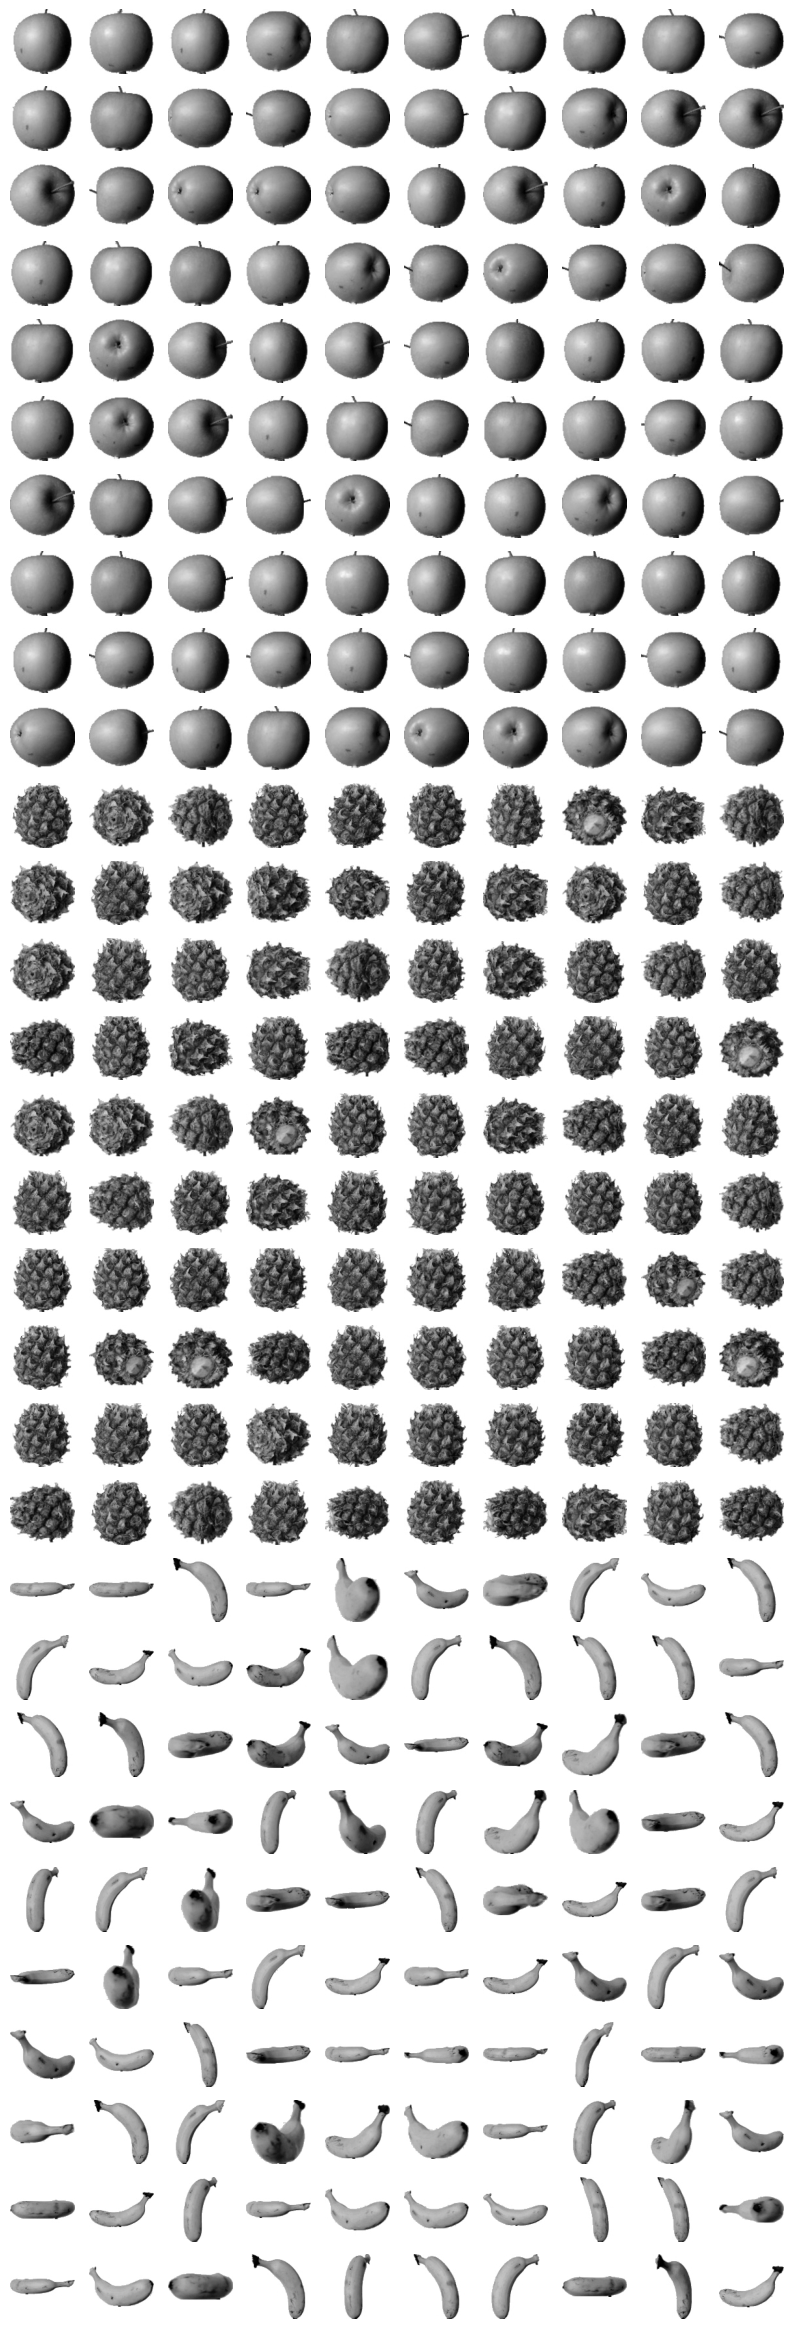

In [11]:
draw_fruits(fruits)

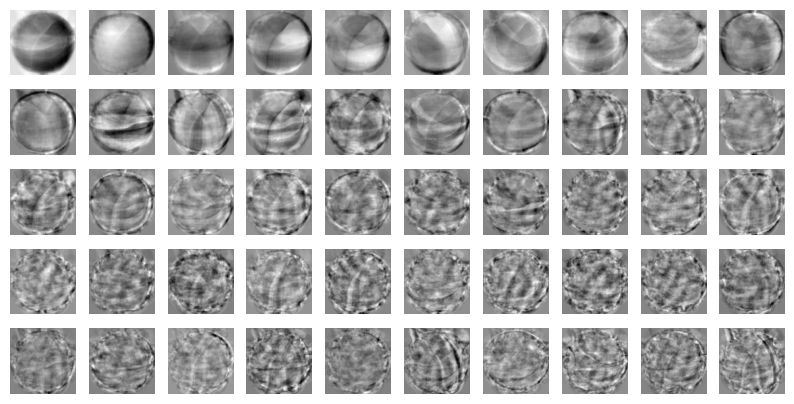

In [12]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [13]:
print(fruits_2d.shape)

(300, 10000)


In [14]:
fruits_pca = pca.transform(fruits_2d)

In [15]:
print(fruits_pca.shape)

(300, 50)


### 원본 데이터 재구성

<!-- 원본 데이터 재구성 -->

In [16]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [17]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

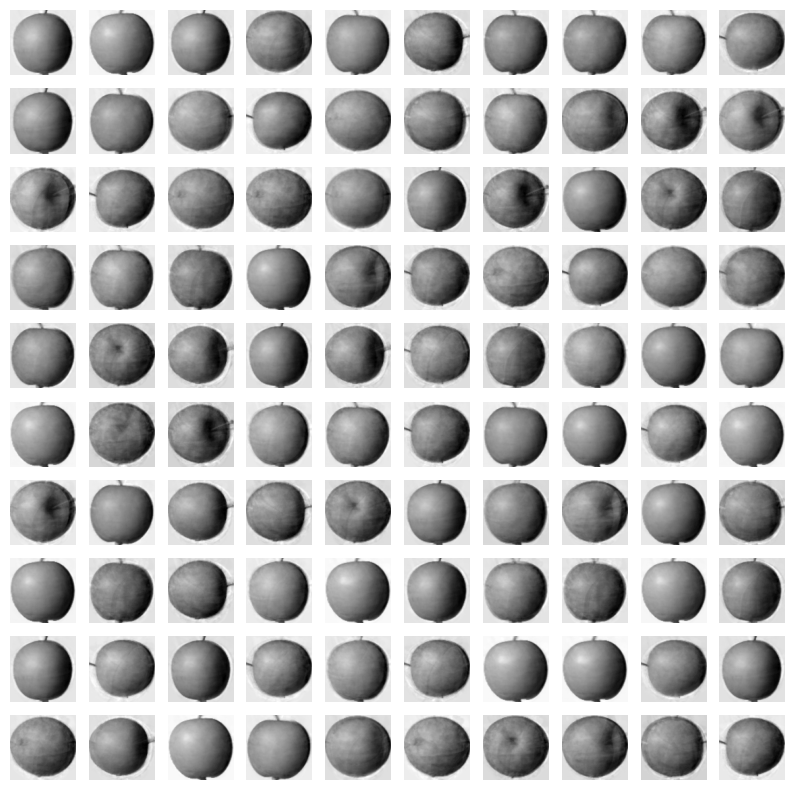

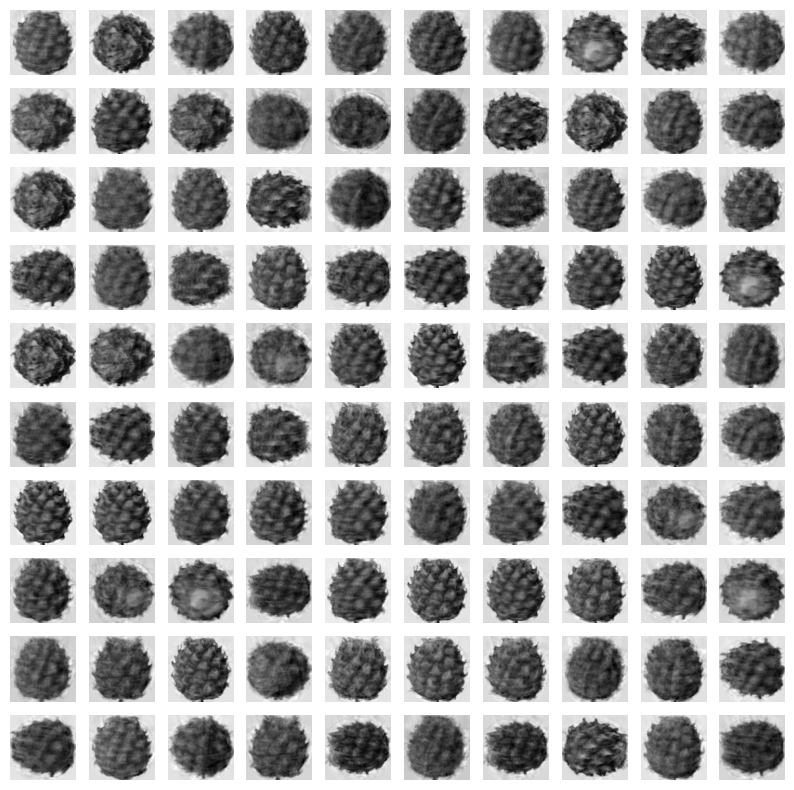

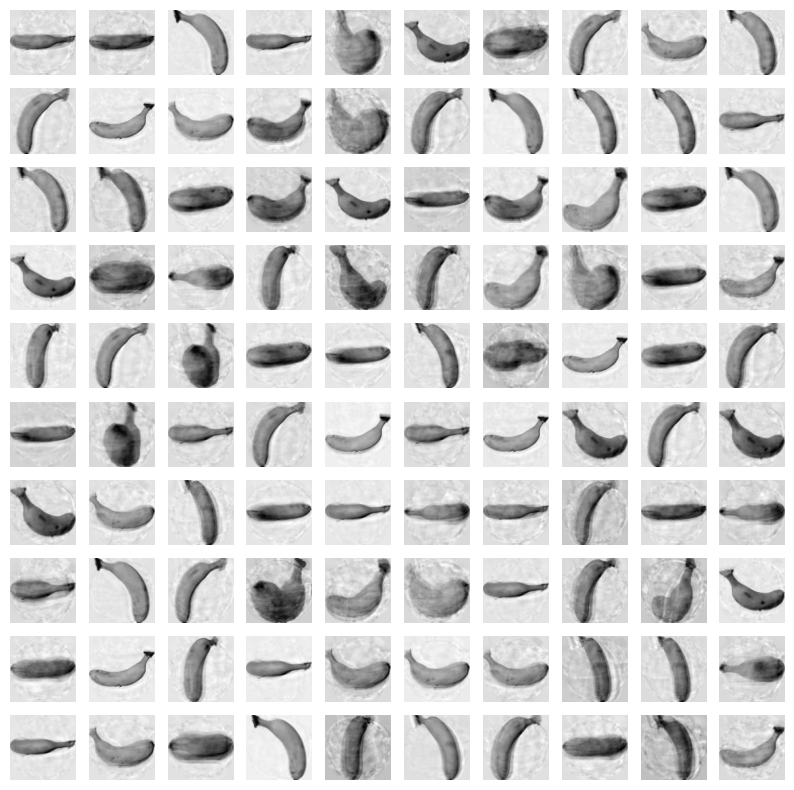

In [18]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [19]:
print(np.sum(pca.explained_variance_ratio_))

0.9214859269678469


In [20]:
import matplotlib.pyplot as plt

In [22]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511201, 0.00486381, 0.00480346,
       0.0044783 , 0.00437318, 0.00408039, 0.00389477, 0.00372435,
       0.00359269, 0.00331445, 0.00317836, 0.00304283, 0.00303771,
       0.00288886, 0.00275818, 0.00264985, 0.00255942, 0.00252144,
       0.00247262, 0.00238893, 0.00230848, 0.00222077, 0.0021651 ,
       0.00213443, 0.00195873, 0.0019284 , 0.00190184, 0.00184267,
       0.0017964 , 0.00172004, 0.00166183, 0.00163377, 0.00159689])

In [23]:
sum(pca.explained_variance_ratio_)

0.9214859269678469

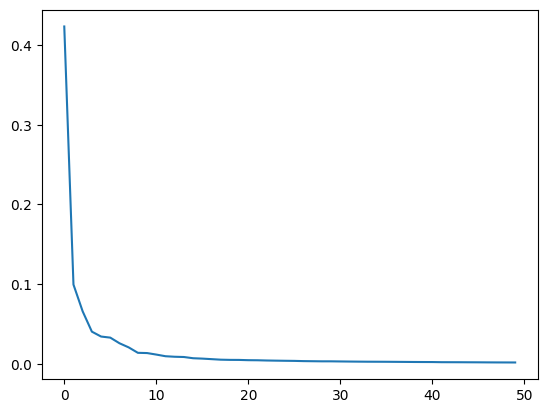

In [21]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

## 차원 축소 후에도 모델의 성능이 줄어드지 않는지 검증

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [25]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [26]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
fruits_2d.shape

(300, 10000)

In [30]:
fruits_pca.shape

(300, 50)

In [27]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.37723445892333984


In [31]:
scores2 = cross_validate(lr, fruits_pca, target)
print(np.mean(scores2['test_score']))
print(np.mean(scores2['fit_time']))

0.9966666666666667
0.007280158996582031


In [32]:
from sklearn.cluster import KMeans

In [33]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [35]:
fruits_pca.shape

(300, 50)

In [36]:
fruits_pca

array([[ 2778.41779459,  1571.87380933, -1335.33773946, ...,
           23.48422652,    26.60358204,   112.51133673],
       [ 3078.27365136,  2739.27040956,  -636.18337227, ...,
           76.74050811,   128.87618729,   -71.77721532],
       [ 2620.61072939,  1486.87055244, -1471.33777718, ...,
           67.84685678,    44.17053955,    75.91432399],
       ...,
       [-5182.12868263,  -121.76051522,  2777.28501508, ...,
         -540.65641263,   129.56365579,   -86.91821398],
       [-3987.98800619,    70.88160651, -2925.55236438, ...,
          249.67852563,  -162.99071071,  -420.70776295],
       [-5823.86570618,  1276.9886688 ,   162.05804088, ...,
         -459.34956755,  -379.76283397,  -174.20047755]])

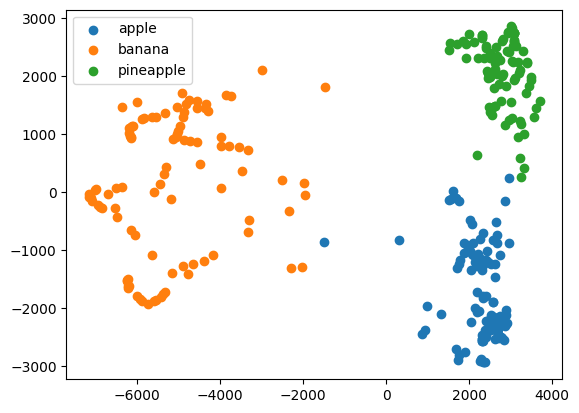

In [34]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()